In [1]:
import pandas as pd

#Reading dataset
df=pd.read_csv(r"C:.../Churn_Modelling.csv")
print(df)

      RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
0             1    15634602        Hargrave          619    France  Female   
1             2    15647311            Hill          608     Spain  Female   
2             3    15619304            Onio          502    France  Female   
3             4    15701354            Boni          699    France  Female   
4             5    15737888        Mitchell          850     Spain  Female   
5             6    15574012             Chu          645     Spain    Male   
6             7    15592531        Bartlett          822    France    Male   
7             8    15656148          Obinna          376   Germany  Female   
8             9    15792365              He          501    France    Male   
9            10    15592389              H?          684    France    Male   
10           11    15767821          Bearce          528    France    Male   
11           12    15737173         Andrews          497     Spa

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df.shape

(10000, 14)

In [5]:
y=df['Exited']
x=df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1, inplace=False)


In [6]:
y.shape

(10000,)

In [7]:
x.shape

(10000, 10)

In [8]:
#create dummy variables
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [9]:
## Concatenate the Data Frames
x = pd.concat([x,geography,gender],axis=1)

In [10]:
x.shape

(10000, 13)

In [11]:
#drop unnecessary variables
x = x.drop(['Geography', 'Gender'],axis=1)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
#ann
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

C:\Users\Prathyusha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
#initializing the ANN
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation='relu', input_dim=11))

In [17]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation='relu'))

In [18]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [19]:
# Compiling the ANN
classifier.compile(optimizer='Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs = 100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 6s 1ms/step - loss: 0.6265 - acc: 0.7042 - val_loss: 0.5388 - val_acc: 0.7925
Epoch 2/100
5359/5359 [==============================] - 2s 339us/step - loss: 0.5107 - acc: 0.7953 - val_loss: 0.4957 - val_acc: 0.7955
Epoch 3/100
5359/5359 [==============================] - 2s 353us/step - loss: 0.4824 - acc: 0.7962 - val_loss: 0.4774 - val_acc: 0.7955
Epoch 4/100
5359/5359 [==============================] - 2s 331us/step - loss: 0.4662 - acc: 0.7962 - val_loss: 0.4645 - val_acc: 0.7955
Epoch 5/100
5359/5359 [==============================] - 2s 335us/step - loss: 0.4533 - acc: 0.7962 - val_loss: 0.4537 - val_acc: 0.7955
Epoch 6/100
5359/5359 [==============================] - 2s 354us/step - loss: 0.4431 - acc: 0.7968 - val_loss: 0.4466 - val_acc: 0.7967
Epoch 7/100
5359/5359 [==============================] - 2s 336us/step - loss: 0.4359 - acc: 0.7977 - val_loss: 0.4414 - val_acc: 0.

5359/5359 [==============================] - 2s 404us/step - loss: 0.3326 - acc: 0.8628 - val_loss: 0.3614 - val_acc: 0.8535
Epoch 61/100
5359/5359 [==============================] - 2s 376us/step - loss: 0.3326 - acc: 0.8619 - val_loss: 0.3608 - val_acc: 0.8520
Epoch 62/100
5359/5359 [==============================] - 2s 386us/step - loss: 0.3325 - acc: 0.8636 - val_loss: 0.3609 - val_acc: 0.8504
Epoch 63/100
5359/5359 [==============================] - 2s 414us/step - loss: 0.3323 - acc: 0.8623 - val_loss: 0.3610 - val_acc: 0.8512
Epoch 64/100
5359/5359 [==============================] - 2s 383us/step - loss: 0.3321 - acc: 0.8636 - val_loss: 0.3611 - val_acc: 0.8538
Epoch 65/100
5359/5359 [==============================] - 2s 400us/step - loss: 0.3318 - acc: 0.8636 - val_loss: 0.3604 - val_acc: 0.8531
Epoch 66/100
5359/5359 [==============================] - 2s 380us/step - loss: 0.3315 - acc: 0.8660 - val_loss: 0.3608 - val_acc: 0.8531
Epoch 67/100
5359/5359 [=======================

In [21]:
# list all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


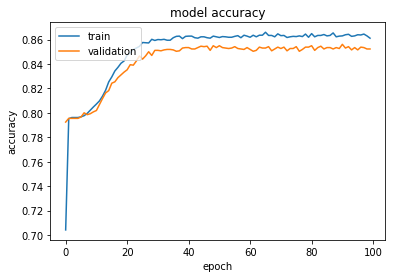

In [22]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

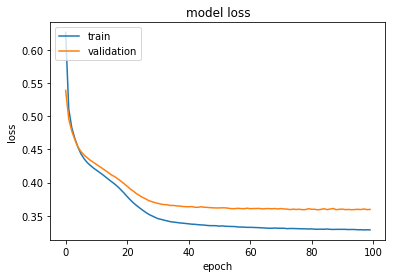

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
cm

array([[1523,   72],
       [ 206,  199]], dtype=int64)

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
score

0.861